In [1]:
import orite as orite
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fasta_path = 'test_data/ecoli_fasta.fna'
genbank_path  = 'test_data/ecoli_genbank.gbff'


In [3]:
# Import fasta seq
seq = orite.seq_from_fasta(fasta_path)
print('Genome length: ',  len(seq))

Genome length:  4641652


In [4]:
# Max rotate 
max_things = orite.max_rotate_seq_and_skew_calc(seq)

max_cg = max_things[0]
max_cgc = max_things[1]
max_fasta = max_things[2]
max_offset = max_things[3]


inital max gc skew indx 1470312
max cgc skew indx 93510


In [5]:
# Z - curve
RY, KM, zn = orite.calc_z_curve(max_fasta)

In [6]:
# Normalize skews 
cgc_scaled = orite.scale_skew(max_cgc)
KM_scaled = orite.scale_skew(KM)

In [7]:
# score curve of: (CGC_SCALED - KM_SCALED)_SCALED
score_curve = orite.scale_skew(cgc_scaled - KM_scaled) 

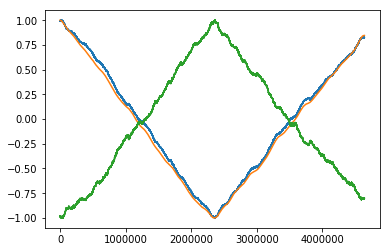

In [8]:
plt.plot(score_curve)
plt.plot(cgc_scaled)
plt.plot(KM_scaled)

In [9]:
# EXTRACT GENBANK INFORMATION and get all non coding regions with scores taken from the score-curve

g = orite.genbank_to_non_coding_intervals(genbank_path)

true_nc_intervals = g[0] # - List of touples
true_nc_positions = g[1] # - all NC positions in an arrays
non_coding_plus = g[2] # - nc regions interval touple list - WILL NOT BE USED
non_coding_neg  = g[3] # - nc regions interval touple list - WILL NOT BE USED

In [10]:
all_nc_regions = orite.get_phased_nc_region_list(true_nc_intervals, seq, max_offset, score_curve)

Filtering process
Total number of intial non coding regions:  3400
Length filtering - number of nc regions above 50 in length:  2400
Kmer Occurence filtering - number of nc regions with kmers  having 3 or more occurances:  99
Overlapp filtering - number of nc regions without overlapping repeats:  72
Number of regions with scores "below"  -0.75 :  12
Number of regions with kmer_densities above  0.01  -  8

---Done---


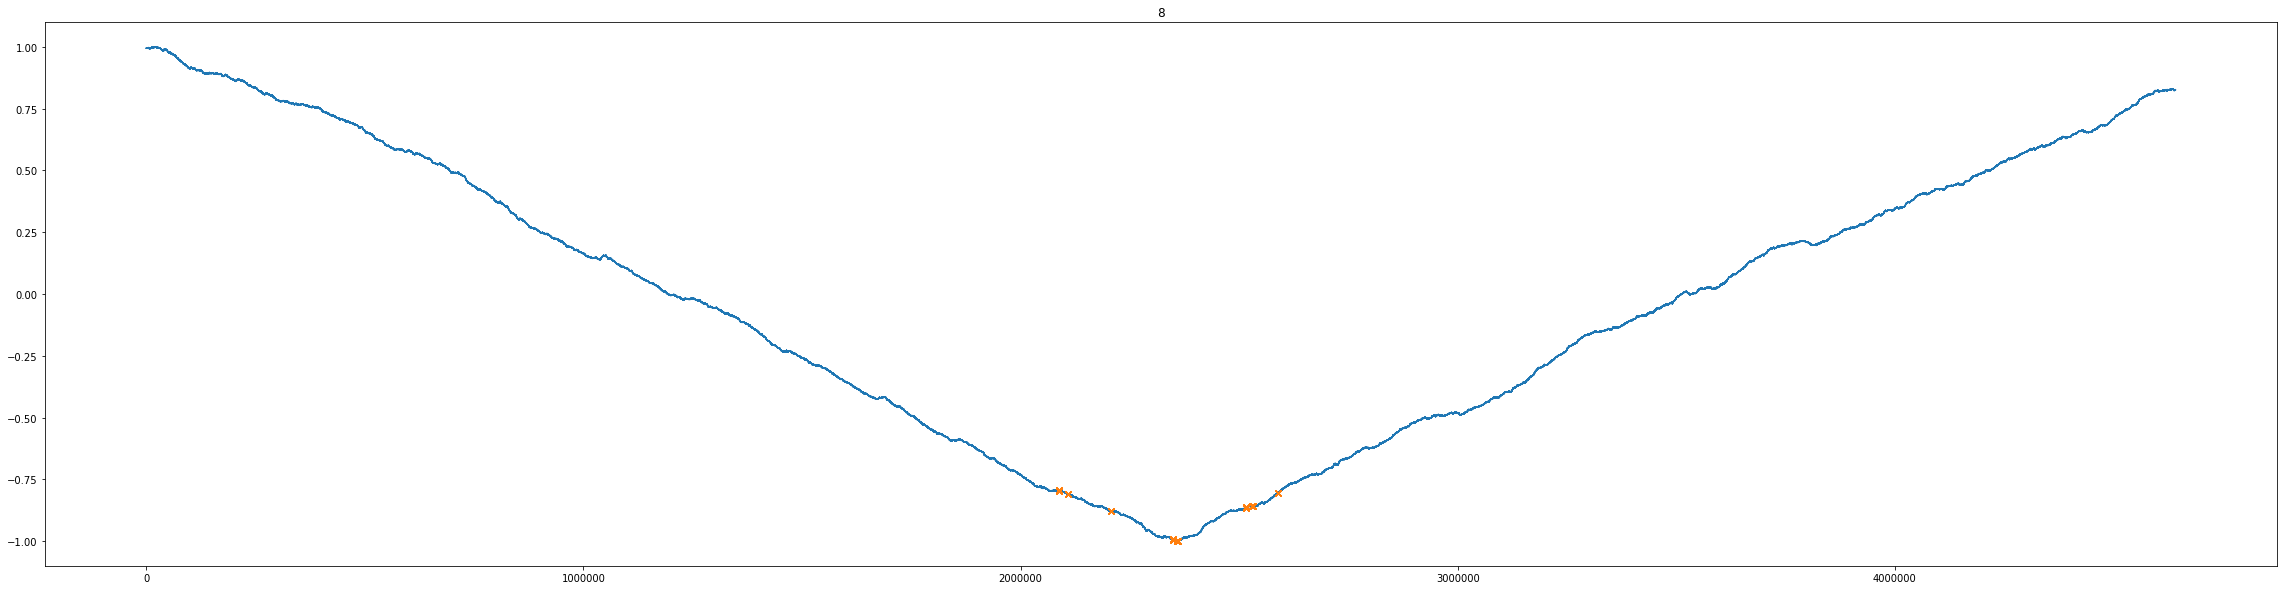

In [11]:
x = orite.prcoess_and_filter_all_nc_regions_list(all_nc_regions, [6,7,8,9], occurance_threshold=5, d_tresh=0.01)

orite.plot_region_list(curve=score_curve, region_list=x, rotated=True)

In [12]:
orite.print_region_list_kmer_info(x)

region: 0 ---  score:  0.9994707145406185 ---- pos:  3922441 ---- max_relative_start_pos 2358619
	k= 6
	 ATTTTT  -  [5, 154, 391, 435, 589, 599]  -  density: 0.011235955056179775
	-------
region: 1 ---  score:  0.9936598584978381 ---- pos:  3911526 ---- max_relative_start_pos 2347704
	k= 6
	 TGACAG  -  [5, 66, 88, 99, 178, 200]  -  density: 0.03731343283582089
	-------
region: 2 ---  score:  0.8785162000637678 ---- pos:  3769681 ---- max_relative_start_pos 2205859
	k= 6
	 AAAAAT  -  [5, 30, 118, 421, 477, 508]  -  density: 0.010460251046025104
	-------
region: 3 ---  score:  0.8639266738900663 ---- pos:  4078439 ---- max_relative_start_pos 2514617
	k= 6
	 ATATTA  -  [5, 42, 67, 149, 294, 419]  -  density: 0.013262599469496022
	-------
region: 4 ---  score:  0.8572351536560034 ---- pos:  4094273 ---- max_relative_start_pos 2530451
	k= 6
	 AGGCCT  -  [5, 111, 136, 203, 295, 387]  -  density: 0.018115942028985508
	 CCTGAT  -  [5, 84, 139, 176, 268, 360]  -  density: 0.018115942028985508
	